In [5]:
import sys
import os

# Add the correct neuralhydrology path to sys.path
neuralhydrology_path = '/home/sngrj0hn/GitHub/neuralhydrology'
if neuralhydrology_path not in sys.path:
    sys.path.insert(0, neuralhydrology_path)

from neuralhydrology.datasetzoo.camelsde import load_camels_de_attributes
from neuralhydrology.datasetzoo.camelsde import load_camels_de_timeseries
from neuralhydrology.datasetzoo.camelsde import CamelsDE
from pathlib import Path
import os
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
mpl.rcParams["grid.color"] = "#eeeeee"
mpl.rcParams["grid.linewidth"] = 0.5
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams.update({'font.size': 11})

In [7]:
data_dir = Path('../../data/camels_de/')

In [8]:
df_attributes = load_camels_de_attributes(data_dir)

## Print all static inputs of the dataset

In [9]:
# print every single column
for col in df_attributes.columns:
    print(col)

p_mean
p_seasonality
frac_snow
high_prec_freq
high_prec_dur
high_prec_timing
low_prec_freq
low_prec_dur
low_prec_timing
aquitard_perc
aquifer_perc
aquifer_aquitard_mixed_perc
kf_very_high_perc
kf_high_perc
kf_medium_perc
kf_moderate_perc
kf_low_perc
kf_very_low_perc
kf_extremely_low_perc
kf_very_high_to_high_perc
kf_medium_to_moderate_perc
kf_low_to_extremely_low_perc
kf_highly_variable_perc
kf_moderate_to_low_perc
cavity_fissure_perc
cavity_pores_perc
cavity_fissure_karst_perc
cavity_fissure_pores_perc
rocktype_sediment_perc
rocktype_metamorphite_perc
rocktype_magmatite_perc
consolidation_solid_rock_perc
consolidation_unconsolidated_rock_perc
geochemical_rocktype_silicate_perc
geochemical_rocktype_silicate_carbonatic_perc
geochemical_rocktype_carbonatic_perc
geochemical_rocktype_sulfatic_perc
geochemical_rocktype_silicate_organic_components_perc
geochemical_rocktype_anthropogenically_modified_through_filling_perc
geochemical_rocktype_sulfatic_halitic_perc
geochemical_rocktype_halitic_

## Plot discharge data of all 5 reservoir inflows in the Harz

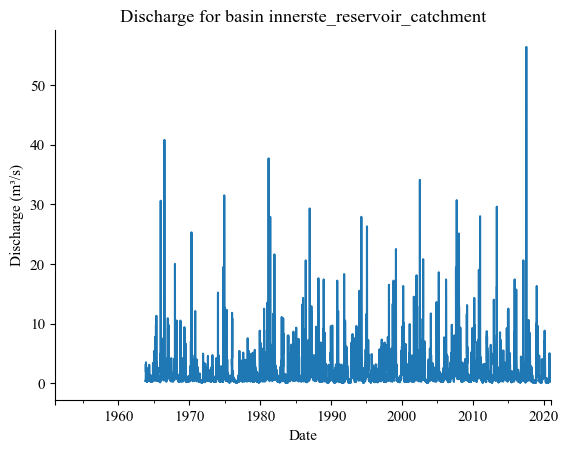

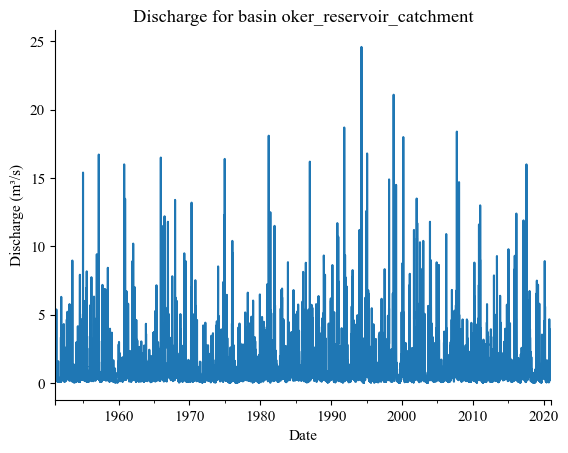

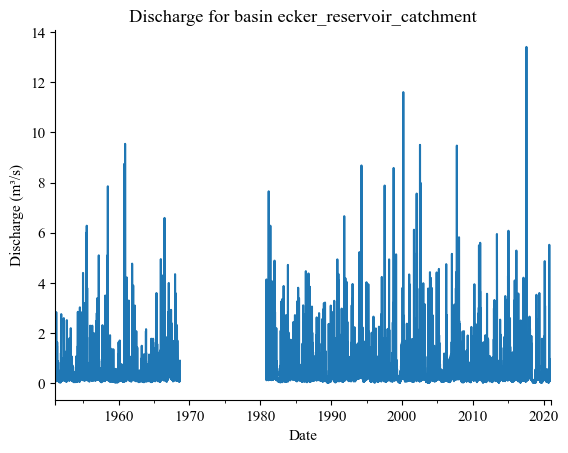

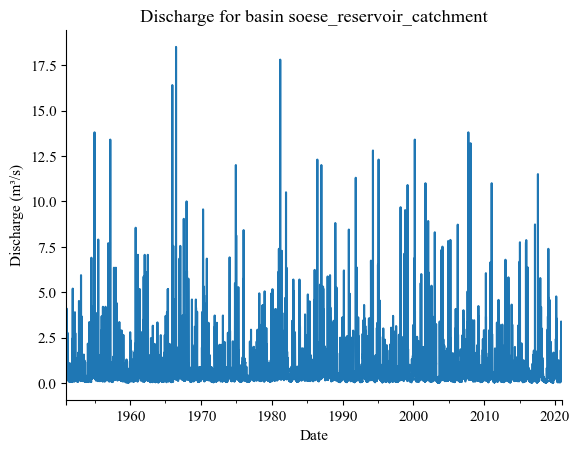

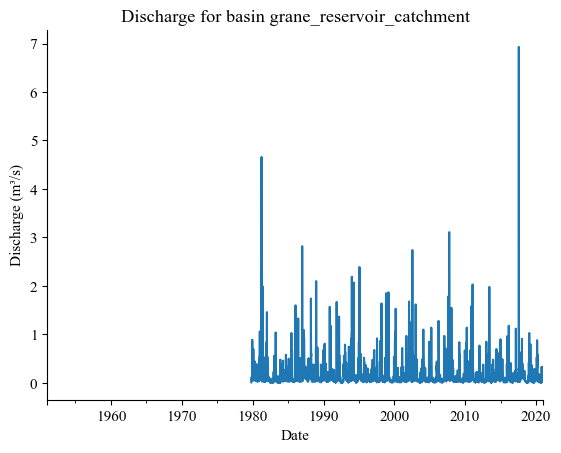

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Set data directory
data_dir = Path('../../data/camels_de/')

# List of basin IDs
basin_ids = ['DE1', 'DE2', 'DE3', 'DE4', 'DE5']

# create mapping
basin_id_mapping = {
    'DE1': 'innerste_reservoir_catchment',
    'DE2': 'oker_reservoir_catchment',
    'DE3': 'ecker_reservoir_catchment',
    'DE4': 'soese_reservoir_catchment',
    'DE5': 'grane_reservoir_catchment'
}

for basin_id in basin_ids:
    # Load the discharge data for the current basin
    df_discharge = load_camels_de_timeseries(data_dir, basin=basin_id)
    
    # Plot the discharge data
    df_discharge['discharge_vol'].plot()

    # Add labels to the x and y axes
    plt.xlabel('Date')
    plt.ylabel('Discharge (m³/s)')

    # Add a title to the plot
    plt.title(f'Discharge for basin {basin_id_mapping[basin_id]}')

    # Display the plot
    plt.show()

## Print dynamic inputs

In [11]:
for col in df_discharge.columns:
    print(col)

discharge_vol
discharge_spec
water_level
precipitation_mean
precipitation_min
precipitation_median
precipitation_max
precipitation_stdev
humidity_mean
humidity_min
humidity_median
humidity_max
humidity_stdev
radiation_global_mean
radiation_global_min
radiation_global_median
radiation_global_max
radiation_global_stdev
temperature_mean
temperature_min
temperature_max


## Print catchments map

In [12]:
# read climate data stored under:
# data/camels_de/CAMELS_DE_climatic_attributes.csv
df_climate = pd.read_csv(data_dir / 'CAMELS_DE_climatic_attributes.csv')

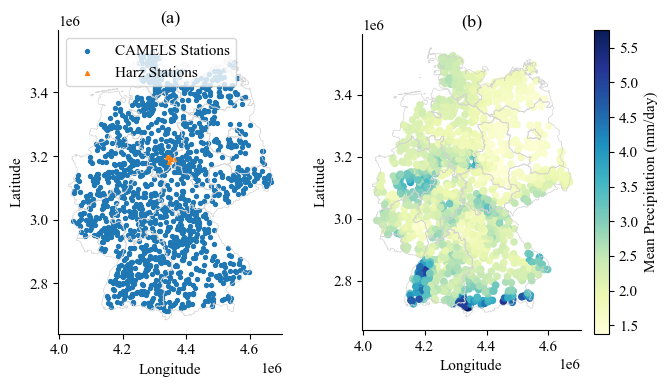

In [13]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (adjust paths as needed)
camels_stations_path = data_dir / 'CAMELS_DE_catchment_boundaries/gauging_stations/CAMELS_DE_gauging_stations.shp'
harz_stations_path = data_dir / 'CAMELS_DE_catchment_boundaries/gauging_stations/HARZ_gauging_stations.shp'
states_path = data_dir / 'CAMELS_DE_catchment_boundaries/state_boundaries/de.shp'

# Read GeoDataFrames
gdf_camels = gpd.read_file(camels_stations_path)
gdf_harz = gpd.read_file(harz_stations_path)
gdf_states = gpd.read_file(states_path)

# Ensure consistent CRS
gdf_harz = gdf_harz.to_crs(gdf_camels.crs)
gdf_states = gdf_states.to_crs(gdf_camels.crs)

# Combine CAMELS and Harz stations
gdf_combined = pd.concat([gdf_camels, gdf_harz], ignore_index=True)

# Assuming df_climate is available with 'gauge_id' and 'p_mean'
# Ensure 'gauge_id' is of the same type in both DataFrames
df_climate['gauge_id'] = df_climate['gauge_id'].astype(str)
gdf_combined['gauge_id'] = gdf_combined['gauge_id'].astype(str)

# Reset the index without adding it as a new column
df_climate = df_climate.reset_index(drop=True)

# Merge combined GeoDataFrame with climate data
gdf_combined_with_climate = gdf_combined.merge(df_climate[['gauge_id', 'p_mean']], on='gauge_id', how='left')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

# Plot 1: Harz and CAMELS stations
gdf_states.boundary.plot(ax=axes[0], color='lightgrey', linewidth=0.5)
gdf_camels.plot(ax=axes[0], marker='o', markersize=8, label='CAMELS Stations')
gdf_harz.plot(ax=axes[0], marker='^', markersize=8
              , label='Harz Stations')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].legend()
axes[0].set_title('(a)')

# Plot 2: Stations with mean precipitation
gdf_states.boundary.plot(ax=axes[1], color='lightgrey', linewidth=0.5)
gdf_combined_with_climate.plot(column='p_mean', cmap='YlGnBu', legend=True, 
                               ax=axes[1], markersize=20,
                               legend_kwds={'label': "Mean Precipitation (mm/day)",
                                            'orientation': "vertical"})
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('(b)')

plt.tight_layout()
plt.savefig('stations_and_precipitation_subplot.png', dpi=300)
plt.show()


## DE1 - Train/Val/Test Distribution
train_start_date: "01/11/1963"
train_end_date: "30/09/2015"
validation_start_date: "01/10/2015"
validation_end_date: "30/09/2018"
test_start_date: "01/10/2018"
test_end_date: "31/12/2020"

## DE2 - Train/Val/Test Distribution
train_start_date: "01/01/1951"
train_end_date: "30/09/2015"
validation_start_date: "01/10/2015"
validation_end_date: "30/09/2018"
test_start_date: "01/10/2018"
test_end_date: "31/12/2020"

## DE3 - Train/Val/Test Distribution
train_start_date: "01/01/1951"
train_end_date: "30/09/2015"
validation_start_date: "01/10/2015"
validation_end_date: "30/09/2018"
test_start_date: "01/10/2018"
test_end_date: "31/12/2020"

## DE4 - Train/Val/Test Distribution
train_start_date: "01/01/1951"
train_end_date: "30/09/2015"
validation_start_date: "01/10/2015"
validation_end_date: "30/09/2018"
test_start_date: "01/10/2018"
test_end_date: "31/12/2020"

## DE5 - Train/Val/Test Distribution
train_start_date: "01/11/1979"
train_end_date: "30/09/2015"
validation_start_date: "01/10/2015"
validation_end_date: "30/09/2018"
test_start_date: "01/10/2018"
test_end_date: "31/12/2020"